In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
url="https://www.fueleconomy.gov/feg/EPAGreenGuide/Smartway/xls/SmartWay%20Vehicle%20List%20for%20MY%202017.xlsx"
#data=pd.read_excel(url) 
#data=pd.read_csv(r'C:/Users/Rani/Documents/Marquette/S4/Data Mining/Project/auto-mpg.csv')    
auto=pd.read_csv(r'C:/Users/Rani/Documents/Marquette/S4/Data Mining/Project/auto-mpg.csv')

In [3]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [4]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [5]:
#print(sorted(data["horsepower"].round().unique()))
np.sort(auto.horsepower.unique())
#data.describe().round(2)

array([  46.,   48.,   49.,   52.,   53.,   54.,   58.,   60.,   61.,
         62.,   63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,
         71.,   72.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
        100.,  102.,  103.,  105.,  107.,  108.,  110.,  112.,  113.,
        115.,  116.,  120.,  122.,  125.,  129.,  130.,  132.,  133.,
        135.,  137.,  138.,  139.,  140.,  142.,  145.,  148.,  149.,
        150.,  152.,  153.,  155.,  158.,  160.,  165.,  167.,  170.,
        175.,  180.,  190.,  193.,  198.,  200.,  208.,  210.,  215.,
        220.,  225.,  230.,   nan])

In [6]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


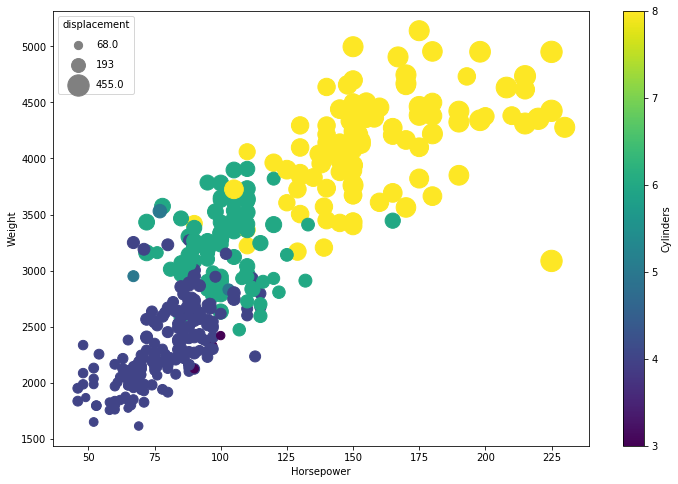

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(auto["horsepower"],auto["weight"],c=auto["cylinders"],s=auto["displacement"],label='')

#sns.lmplot("horsepower","weight",data=data,hue="cylinders")
plt.xlabel("Horsepower")
plt.ylabel("Weight")
plt.colorbar(label="Cylinders")
dpl=[np.min(auto["displacement"]),np.mean(auto["displacement"]),np.max(auto["displacement"])]
for i in dpl:
    plt.scatter([],[],marker='o',c='grey',s=i,label=round(i))
    plt.legend(labelspacing=1,title="displacement")

C:\Users\Rani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Rani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Rani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Rani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


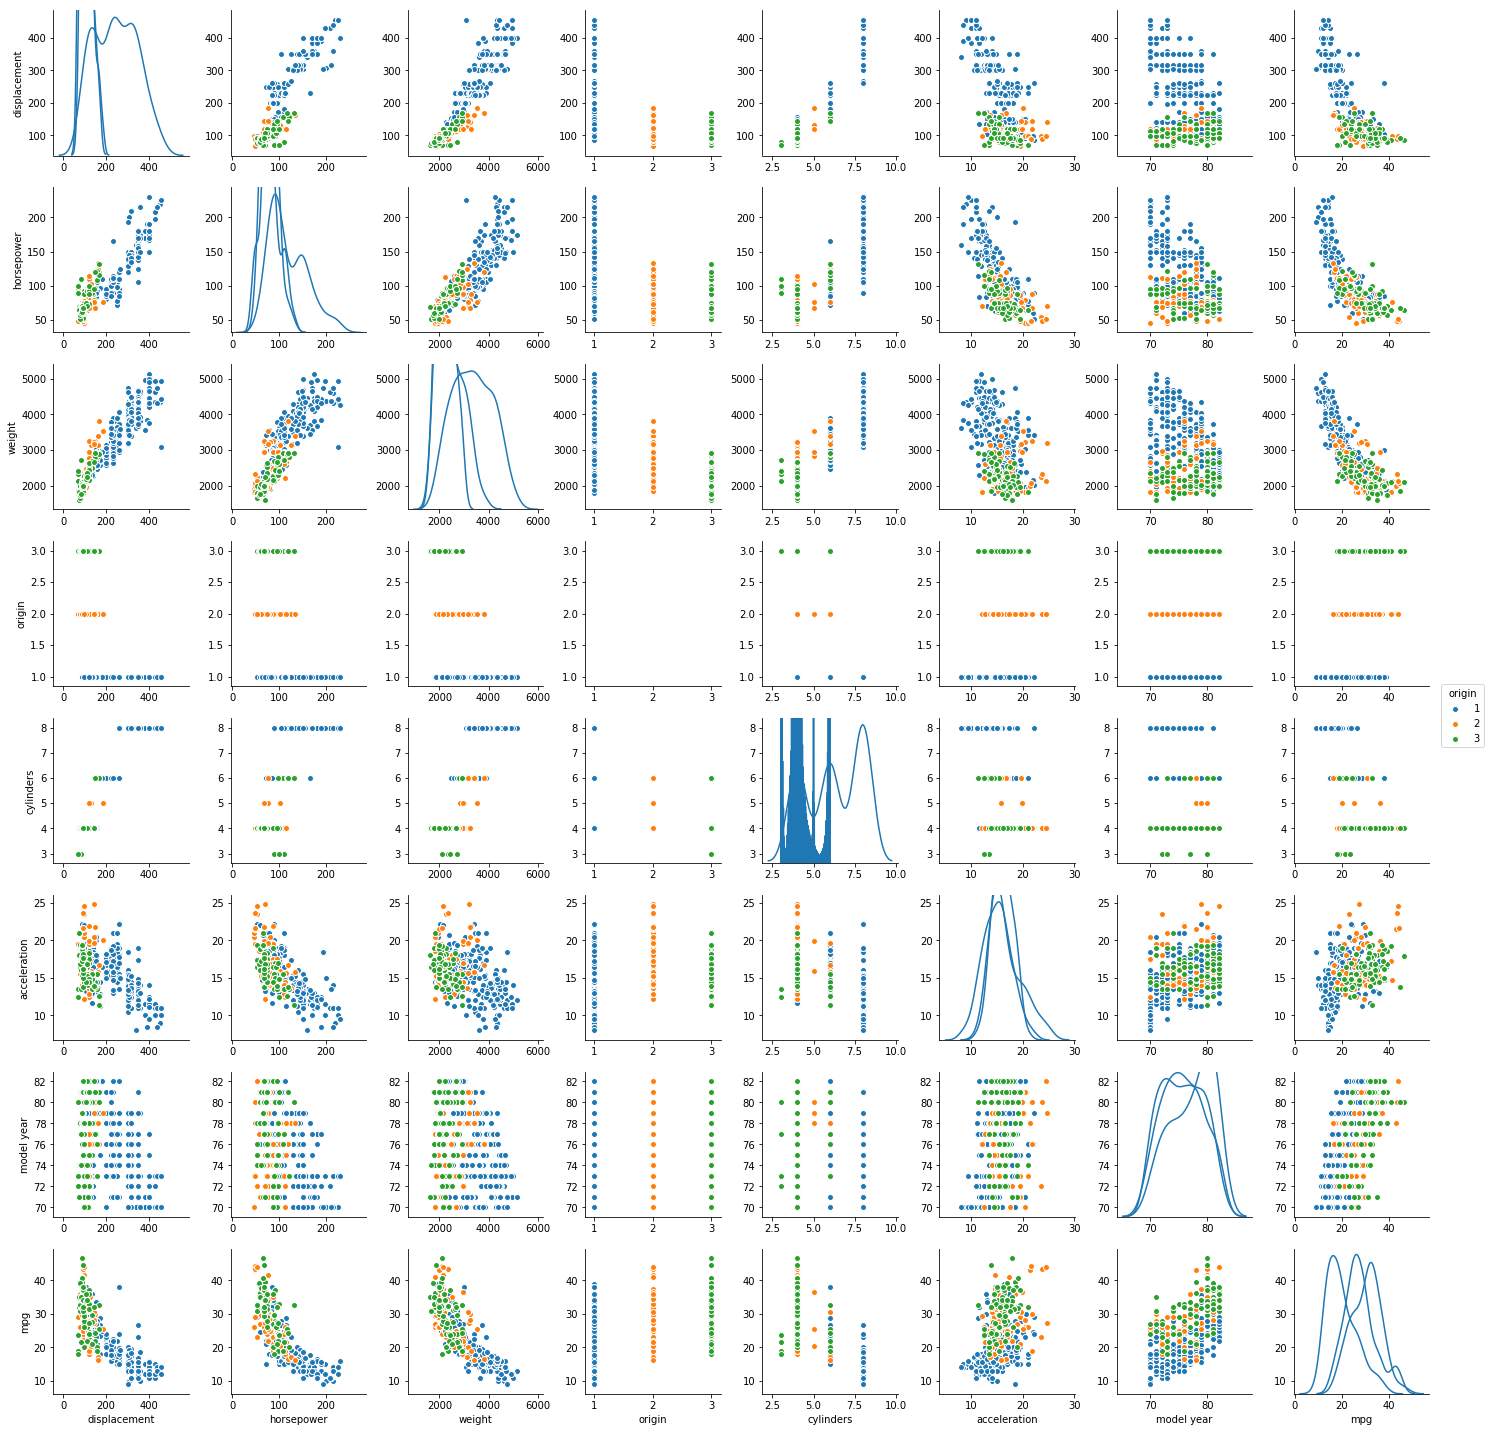

In [8]:
features =['displacement', 'horsepower', 'weight','origin','cylinders','acceleration','model year','mpg']
sns.pairplot(auto[features],hue='origin',diag_kind='kde')

In [9]:
#meanhp = data['horsepower'].mean()
#data['horsepower'] = data['horsepower'].fillna(meanhp)
#np.sort(data.horsepower.unique())

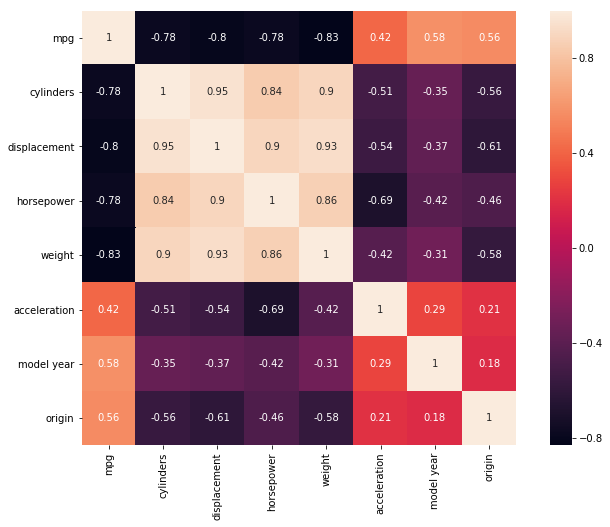

In [10]:
plt.figure(figsize=(12,8))
corr=auto.corr()
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
#sns.heatmap(corr,mask=mask,annot=True)
sns.heatmap(corr,square=True, annot=True)

In [11]:
#Using linear regression to impute missing values of horsepower
weight=auto.loc[~auto["horsepower"].isnull(),"weight"].values.reshape(-1,1)
hp=auto.loc[~auto["horsepower"].isnull(),"horsepower"].values.reshape(-1,1)
lr=LR()
lr.fit(weight,hp)
values=lr.predict(auto.loc[auto["horsepower"].isnull(),"weight"].values.reshape(-1,1)).flatten()
lst=auto["horsepower"].isnull()
lst=np.array(lst[lst].index)
for i,j in zip(lst,values):
  auto.loc[i,"horsepower"]=j

In [12]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [13]:
#data["origin"]=data["origin"].map({1:'USA',2:'EU',3:'Japan'})
auto["car name"].unique()
auto["brand"],auto["model"] = auto["car name"].str.split(' ',1).str

(0, 40)

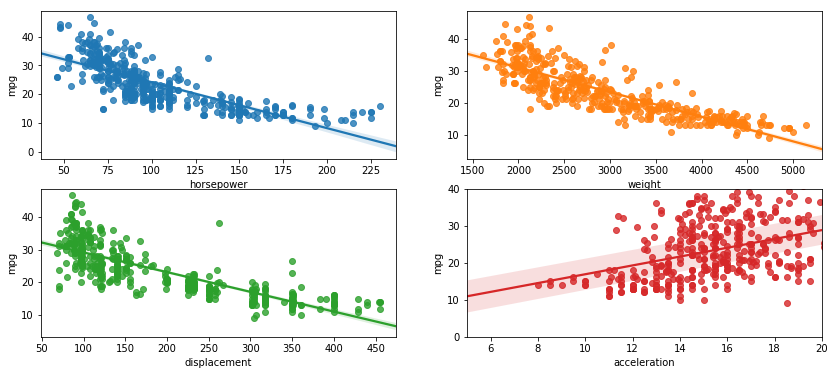

In [14]:
fig=plt.figure()
fig,ax=plt.subplots(2,2,figsize=(14,6))
sns.regplot(auto["horsepower"],auto["mpg"],ax=ax[0][0])
sns.regplot(auto["weight"],auto["mpg"],ax=ax[0][1])
sns.regplot(auto["displacement"],auto["mpg"],ax=ax[1][0])
sns.regplot(auto["acceleration"],auto["mpg"],ax=ax[1][1])
plt.xlim(5,20)
plt.ylim(0,40)

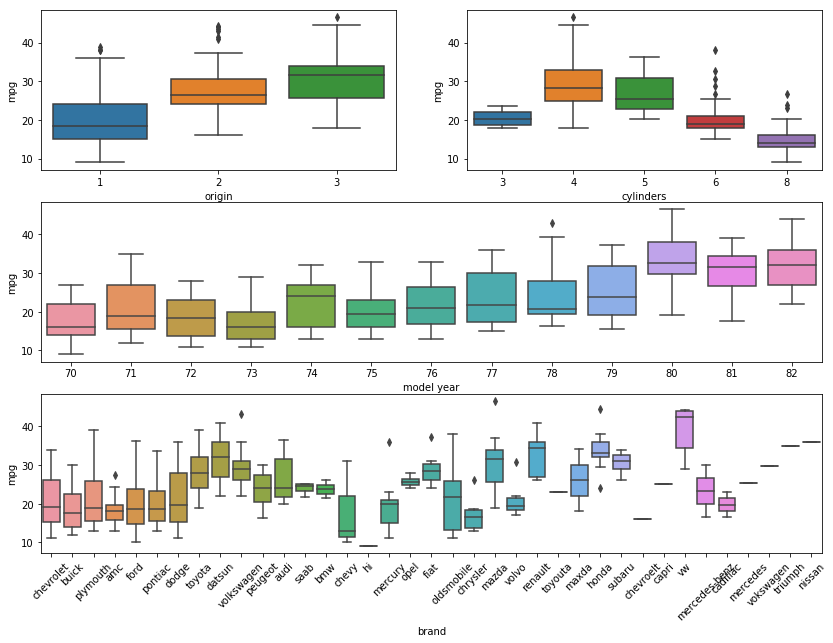

In [15]:
fig=plt.figure()
fig,ax=plt.subplots(figsize=(14,10))
ax1=plt.subplot(321)
ax2=plt.subplot(322)
ax3=plt.subplot(312)
ax4=plt.subplot(313)
sns.boxplot(auto["origin"],auto["mpg"],ax=ax1)
sns.boxplot(auto["cylinders"],auto["mpg"],ax=ax2)
sns.boxplot(auto["brand"],auto["mpg"],ax=ax4)
sns.boxplot(auto["model year"],auto["mpg"],ax=ax3)
plt.xticks(rotation=45)
plt.savefig("C:/Users/Rani/Documents/Marquette/S4/Data Mining/Project/boxplot.png")

In [16]:
#Stats for mpg
auto.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [19]:
#Starting Linear Regression with Forward Feature Selection
#Round 1 : individual variables

factors1 = ['cylinders']
X1 = pd.DataFrame(auto[factors1].copy())
y1 = auto['mpg'].copy()
#Scaling
X1 = StandardScaler().fit_transform(X1)
#Split into test and train sets
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size = 0.33,random_state=1)
X1_train.shape[0] == y1_train.shape[0]

True

In [20]:
regr=LR()
regr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [21]:
regr.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
#Predicting
y1_predicted = regr.predict(X1_test)
#Calculating RMSE of test data vs predicted data
rmse1 = sqrt(mean_squared_error(y_true=y1_test,y_pred=y1_predicted))
rmse1

4.618091275819769

In [23]:
factors2 = ['displacement']
X2 = pd.DataFrame(auto[factors2].copy())
y2 = auto['mpg'].copy()

X2 = StandardScaler().fit_transform(X2)

X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size = 0.33,random_state=1)
X2_train.shape[0] == y2_train.shape[0]

regr.get_params()
regr.fit(X2_train,y2_train)
y2_predicted = regr.predict(X2_test)

rmse2 = sqrt(mean_squared_error(y_true=y2_test,y_pred=y2_predicted))
rmse2

4.284701648664034

In [24]:
factors3 = ['horsepower']
X3 = pd.DataFrame(auto[factors3].copy())
y3 = auto['mpg'].copy()

X3 = StandardScaler().fit_transform(X3)

X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size = 0.33,random_state=1)
X3_train.shape[0] == y3_train.shape[0]

regr.get_params()
regr.fit(X3_train,y3_train)
y3_predicted = regr.predict(X3_test)

rmse3 = sqrt(mean_squared_error(y_true=y3_test,y_pred=y3_predicted))
rmse3

4.651546692310375

In [25]:
factors4 = ['weight']
X4 = pd.DataFrame(auto[factors4].copy())
y4 = auto['mpg'].copy()

X4 = StandardScaler().fit_transform(X4)

X4_train,X4_test,y4_train,y4_test=train_test_split(X4,y4,test_size = 0.33,random_state=1)
X4_train.shape[0] == y4_train.shape[0]

regr.get_params()
regr.fit(X4_train,y4_train)
y4_predicted = regr.predict(X4_test)

rmse4 = sqrt(mean_squared_error(y_true=y4_test,y_pred=y4_predicted))
rmse4

3.9657386366664547

In [26]:
factors5 = ['acceleration']
X5 = pd.DataFrame(auto[factors5].copy())
y5 = auto['mpg'].copy()

X5 = StandardScaler().fit_transform(X5)

X5_train,X5_test,y5_train,y5_test=train_test_split(X5,y5,test_size = 0.33,random_state=1)
X5_train.shape[0] == y5_train.shape[0]

regr.get_params()
regr.fit(X5_train,y5_train)
y5_predicted = regr.predict(X5_test)

rmse5 = sqrt(mean_squared_error(y_true=y5_test,y_pred=y5_predicted))
rmse5

6.848199183734168

In [27]:
factors6 = ['model year']
X6 = pd.DataFrame(auto[factors6].copy())
y6 = auto['mpg'].copy()

X6 = StandardScaler().fit_transform(X6)

X6_train,X6_test,y6_train,y6_test=train_test_split(X6,y6,test_size = 0.33,random_state=1)
X6_train.shape[0] == y6_train.shape[0]

regr.get_params()
regr.fit(X6_train,y6_train)
y6_predicted = regr.predict(X6_test)

rmse6 = sqrt(mean_squared_error(y_true=y6_test,y_pred=y6_predicted))
rmse6

6.06318006782531

In [28]:
factors7 = ['origin']
X7 = pd.DataFrame(auto[factors7].copy())
y7 = auto['mpg'].copy()

X7 = StandardScaler().fit_transform(X7)

X7_train,X7_test,y7_train,y7_test=train_test_split(X7,y7,test_size = 0.33,random_state=1)
X7_train.shape[0] == y7_train.shape[0]

regr.get_params()
regr.fit(X7_train,y7_train)
y7_predicted = regr.predict(X7_test)

rmse7 = sqrt(mean_squared_error(y_true=y7_test,y_pred=y7_predicted))
rmse7

5.851527194127615

In [29]:
#Round 2 of Forward Feature Selection: Combining the best variable from Round 1 (lowest RMSE) with a second variable

In [30]:
factors8 = ['weight', 'cylinders']
X8 = pd.DataFrame(auto[factors8].copy())
y8 = auto['mpg'].copy()

X8 = StandardScaler().fit_transform(X8)

X8_train,X8_test,y8_train,y8_test=train_test_split(X8,y8,test_size = 0.33,random_state=1)
X8_train.shape[0] == y8_train.shape[0]

regr.get_params()
regr.fit(X8_train,y8_train)
y8_predicted = regr.predict(X8_test)

rmse8 = sqrt(mean_squared_error(y_true=y8_test,y_pred=y8_predicted))
rmse8

3.9309561036070604

In [31]:
factors9 = ['weight', 'displacement']
X9 = pd.DataFrame(auto[factors9].copy())
y9 = auto['mpg'].copy()

X9 = StandardScaler().fit_transform(X9)

X9_train,X9_test,y9_train,y9_test=train_test_split(X9,y9,test_size = 0.33,random_state=1)
X9_train.shape[0] == y9_train.shape[0]

regr.get_params()
regr.fit(X9_train,y9_train)
y9_predicted = regr.predict(X9_test)

rmse9 = sqrt(mean_squared_error(y_true=y9_test,y_pred=y9_predicted))
rmse9

3.892086206149341

In [32]:
factors10 = ['weight', 'horsepower']
X10 = pd.DataFrame(auto[factors10].copy())
y10 = auto['mpg'].copy()

X10 = StandardScaler().fit_transform(X10)

X10_train,X10_test,y10_train,y10_test=train_test_split(X10,y10,test_size = 0.33,random_state=1)
X10_train.shape[0] == y10_train.shape[0]

regr.get_params()
regr.fit(X10_train,y10_train)
y10_predicted = regr.predict(X10_test)

rmse10 = sqrt(mean_squared_error(y_true=y10_test,y_pred=y10_predicted))
rmse10

3.84726898799603

In [33]:
factors11 = ['weight', 'acceleration']
X11 = pd.DataFrame(auto[factors11].copy())
y11 = auto['mpg'].copy()

X11 = StandardScaler().fit_transform(X11)

X11_train,X11_test,y11_train,y11_test=train_test_split(X11,y11,test_size = 0.33,random_state=1)
X11_train.shape[0] == y11_train.shape[0]

regr.get_params()
regr.fit(X11_train,y11_train)
y11_predicted = regr.predict(X11_test)

rmse11 = sqrt(mean_squared_error(y_true=y11_test,y_pred=y11_predicted))
rmse11

3.900334441555429

In [34]:
factors12 = ['weight', 'model year']
X12 = pd.DataFrame(auto[factors12].copy())
y12 = auto['mpg'].copy()

X12 = StandardScaler().fit_transform(X12)

X12_train,X12_test,y12_train,y12_test=train_test_split(X12,y12,test_size = 0.33,random_state=1)
X12_train.shape[0] == y12_train.shape[0]

regr.get_params()
regr.fit(X12_train,y12_train)
y12_predicted = regr.predict(X12_test)

rmse12 = sqrt(mean_squared_error(y_true=y12_test,y_pred=y12_predicted))
rmse12

3.0848659845043622

In [35]:
factors13 = ['weight', 'origin']
X13 = pd.DataFrame(auto[factors13].copy())
y13 = auto['mpg'].copy()

X13 = StandardScaler().fit_transform(X13)

X13_train,X13_test,y13_train,y13_test=train_test_split(X13,y13,test_size = 0.33,random_state=1)
X13_train.shape[0] == y13_train.shape[0]

regr.get_params()
regr.fit(X13_train,y13_train)
y13_predicted = regr.predict(X13_test)

rmse13 = sqrt(mean_squared_error(y_true=y13_test,y_pred=y13_predicted))
rmse13

3.8311426717147987

In [128]:
#Round 3: 3 variables - starting with the best feature from Round 2

In [36]:
factors14 = ['weight', 'model year', 'cylinders']
X14 = pd.DataFrame(auto[factors14].copy())
y14 = auto['mpg'].copy()

X14 = StandardScaler().fit_transform(X14)

X14_train,X14_test,y14_train,y14_test=train_test_split(X14,y14,test_size = 0.33,random_state=1)
X14_train.shape[0] == y14_train.shape[0]

regr.get_params()
regr.fit(X14_train,y14_train)
y14_predicted = regr.predict(X14_test)

rmse14 = sqrt(mean_squared_error(y_true=y14_test,y_pred=y14_predicted))
rmse14

3.0879575636329926

In [37]:
factors15 = ['weight', 'model year', 'displacement']
X15 = pd.DataFrame(auto[factors15].copy())
y15 = auto['mpg'].copy()

X15 = StandardScaler().fit_transform(X15)

X15_train,X15_test,y15_train,y15_test=train_test_split(X15,y15,test_size = 0.33,random_state=1)
X15_train.shape[0] == y15_train.shape[0]

regr.get_params()
regr.fit(X15_train,y15_train)
y15_predicted = regr.predict(X15_test)

rmse15 = sqrt(mean_squared_error(y_true=y15_test,y_pred=y15_predicted))
rmse15

3.100317797801715

In [38]:
factors16 = ['weight', 'model year', 'horsepower']
X16 = pd.DataFrame(auto[factors16].copy())
y16 = auto['mpg'].copy()

X16 = StandardScaler().fit_transform(X16)

X16_train,X16_test,y16_train,y16_test=train_test_split(X16,y16,test_size = 0.33,random_state=1)
X16_train.shape[0] == y16_train.shape[0]

regr.get_params()
regr.fit(X16_train,y16_train)
y16_predicted = regr.predict(X16_test)

rmse16 = sqrt(mean_squared_error(y_true=y16_test,y_pred=y16_predicted))
rmse16

3.091833769413819

In [39]:
factors17 = ['weight', 'model year', 'acceleration']
X17 = pd.DataFrame(auto[factors17].copy())
y17 = auto['mpg'].copy()

X17 = StandardScaler().fit_transform(X17)

X17_train,X17_test,y17_train,y17_test=train_test_split(X17,y17,test_size = 0.33,random_state=1)
X17_train.shape[0] == y17_train.shape[0]

regr.get_params()
regr.fit(X17_train,y17_train)
y17_predicted = regr.predict(X17_test)

rmse17 = sqrt(mean_squared_error(y_true=y17_test,y_pred=y17_predicted))
rmse17

3.0789293901533954

In [40]:
factors18 = ['weight', 'model year', 'origin']
X18 = pd.DataFrame(auto[factors18].copy())
y18 = auto['mpg'].copy()

X18 = StandardScaler().fit_transform(X18)

X18_train,X18_test,y18_train,y18_test=train_test_split(X18,y18,test_size = 0.33,random_state=1)
X18_train.shape[0] == y18_train.shape[0]

regr.get_params()
regr.fit(X18_train,y18_train)
y18_predicted = regr.predict(X18_test)

rmse18 = sqrt(mean_squared_error(y_true=y18_test,y_pred=y18_predicted))
rmse18

2.9259661389073286

In [134]:
#Round 4: 4 variables - starting with the best feature from Round 3

In [41]:
factors19 = ['weight', 'model year', 'origin', 'cylinders']
X19 = pd.DataFrame(auto[factors19].copy())
y19 = auto['mpg'].copy()

X19 = StandardScaler().fit_transform(X19)

X19_train,X19_test,y19_train,y19_test=train_test_split(X19,y19,test_size = 0.33,random_state=1)
X19_train.shape[0] == y19_train.shape[0]

regr.get_params()
regr.fit(X19_train,y19_train)
y19_predicted = regr.predict(X19_test)

rmse19 = sqrt(mean_squared_error(y_true=y19_test,y_pred=y19_predicted))
rmse19

2.9308026132573204

In [42]:
factors20 = ['weight', 'model year', 'origin', 'displacement']
X20 = pd.DataFrame(auto[factors20].copy())
y20 = auto['mpg'].copy()

X20 = StandardScaler().fit_transform(X20)

X20_train,X20_test,y20_train,y20_test=train_test_split(X20,y20,test_size = 0.33,random_state=1)
X20_train.shape[0] == y20_train.shape[0]

regr.get_params()
regr.fit(X20_train,y20_train)
y20_predicted = regr.predict(X20_test)

rmse20 = sqrt(mean_squared_error(y_true=y20_test,y_pred=y20_predicted))
rmse20

2.9390582459294707

In [43]:
factors21 = ['weight', 'model year', 'origin', 'horsepower']
X21 = pd.DataFrame(auto[factors21].copy())
y21 = auto['mpg'].copy()

X21 = StandardScaler().fit_transform(X21)

X21_train,X21_test,y21_train,y21_test=train_test_split(X21,y21,test_size = 0.33,random_state=1)
X21_train.shape[0] == y21_train.shape[0]

regr.get_params()
regr.fit(X21_train,y21_train)
y21_predicted = regr.predict(X21_test)

rmse21 = sqrt(mean_squared_error(y_true=y21_test,y_pred=y21_predicted))
rmse21

2.9325126407014395

In [44]:
factors22 = ['weight', 'model year', 'origin', 'acceleration']
X22 = pd.DataFrame(auto[factors22].copy())
y22 = auto['mpg'].copy()

X22 = StandardScaler().fit_transform(X22)

X22_train,X22_test,y22_train,y22_test=train_test_split(X22,y22,test_size = 0.33,random_state=1)
X22_train.shape[0] == y22_train.shape[0]

regr.get_params()
regr.fit(X22_train,y22_train)
y22_predicted = regr.predict(X22_test)

rmse22 = sqrt(mean_squared_error(y_true=y22_test,y_pred=y22_predicted))
rmse22

2.9155799266560454

In [ ]:
#Round 5: 5 variables - starting with the best feature from Round 4

In [45]:
factors23 = ['weight', 'model year', 'origin', 'acceleration', 'cylinders']
X23 = pd.DataFrame(auto[factors23].copy())
y23 = auto['mpg'].copy()

X23 = StandardScaler().fit_transform(X23)

X23_train,X23_test,y23_train,y23_test=train_test_split(X23,y23,test_size = 0.33,random_state=1)
X23_train.shape[0] == y23_train.shape[0]

regr.get_params()
regr.fit(X23_train,y23_train)
y23_predicted = regr.predict(X23_test)

rmse23 = sqrt(mean_squared_error(y_true=y23_test,y_pred=y23_predicted))
rmse23

2.92108726101938

In [46]:
factors24 = ['weight', 'model year', 'origin', 'acceleration', 'displacement']
X24 = pd.DataFrame(auto[factors24].copy())
y24 = auto['mpg'].copy()

X24 = StandardScaler().fit_transform(X24)

X24_train,X24_test,y24_train,y24_test=train_test_split(X24,y24,test_size = 0.33,random_state=1)
X24_train.shape[0] == y24_train.shape[0]

regr.get_params()
regr.fit(X24_train,y24_train)
y24_predicted = regr.predict(X24_test)

rmse24 = sqrt(mean_squared_error(y_true=y24_test,y_pred=y24_predicted))
rmse24

2.9189619931041215

In [47]:
factors25 = ['weight', 'model year', 'origin', 'acceleration', 'horsepower']
X25 = pd.DataFrame(auto[factors25].copy())
y25 = auto['mpg'].copy()

X25 = StandardScaler().fit_transform(X25)

X25_train,X25_test,y25_train,y25_test=train_test_split(X25,y25,test_size = 0.33,random_state=1)
X25_train.shape[0] == y25_train.shape[0]

regr.get_params()
regr.fit(X25_train,y25_train)
y25_predicted = regr.predict(X25_test)

rmse25 = sqrt(mean_squared_error(y_true=y25_test,y_pred=y25_predicted))
rmse25

2.9371939874741533

In [48]:
#Round 6: 6 variables - starting with the best feature from Round 5

In [53]:
factors26 = ['weight', 'model year', 'origin', 'acceleration', 'displacement', 'cylinders']
X26 = pd.DataFrame(auto[factors26].copy())
y26 = auto['mpg'].copy()

X26 = StandardScaler().fit_transform(X26)

X26_train,X26_test,y26_train,y26_test=train_test_split(X26,y26,test_size = 0.33,random_state=1)
X26_train.shape[0] == y26_train.shape[0]

regr.get_params()
regr.fit(X26_train,y26_train)
y26_predicted = regr.predict(X26_test)

rmse26 = sqrt(mean_squared_error(y_true=y26_test,y_pred=y26_predicted))
rmse26

2.9169405316368877

In [55]:
factors27 = ['weight', 'model year', 'origin', 'acceleration','displacement', 'horsepower']
X27 = pd.DataFrame(auto[factors27].copy())
y27 = auto['mpg'].copy()

X27 = StandardScaler().fit_transform(X27)

X27_train,X27_test,y27_train,y27_test=train_test_split(X27,y27,test_size = 0.33,random_state=1)
X27_train.shape[0] == y27_train.shape[0]

regr.get_params()
regr.fit(X27_train,y27_train)
y27_predicted = regr.predict(X27_test)

rmse27 = sqrt(mean_squared_error(y_true=y27_test,y_pred=y27_predicted))
rmse27

2.939945334888448

In [51]:
#Round 7: Final round with all 7 variables - with the best feature from Round 6

In [56]:
factors28 = ['weight', 'model year', 'origin', 'acceleration', 'displacement','cylinders', 'horsepower']
X28 = pd.DataFrame(auto[factors28].copy())
y28 = auto['mpg'].copy()

X28 = StandardScaler().fit_transform(X28)

X28_train,X28_test,y28_train,y28_test=train_test_split(X28,y28,test_size = 0.33,random_state=1)
X28_train.shape[0] == y28_train.shape[0]

regr.get_params()
regr.fit(X28_train,y28_train)
y28_predicted = regr.predict(X28_test)

rmse28 = sqrt(mean_squared_error(y_true=y28_test,y_pred=y28_predicted))
rmse28

2.927363822710799